<a href="https://colab.research.google.com/github/abubakarrahmah6788-alt/Web-scrapping-/blob/main/ashes_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = "https://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
response = response.content
print(response)

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [ ]:
soup = BeautifulSoup(response, 'html.parser')
print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [ ]:
ol = soup.find('ol')
print(ol)

<ol class="row">
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="tipping-th

In [ ]:
articles = ol.find_all('article')
print(articles)

[<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>, <article class="product_pod">
<div class="image_container">
<a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache/26/0c/260c6ae16bce31c8f8c9

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

books = []
# Iterate through pages 1 to 4
for i in range(1, 5):
    url = "https://books.toscrape.com/catalogue/page-{}.html".format(i)
    response = requests.get(url)

    # Parse the content of each page
    soup = BeautifulSoup(response.content, 'html.parser')
    ol = soup.find('ol')

    if ol: # Ensure 'ol' element exists before trying to find articles
        articles = ol.find_all('article')

        for article in articles:
            # Extract title
            image_url = article.find('img')
            title = image_url['alt']

            # Extract star rating
            star_tag = article.find('p', class_='star-rating')
            star = star_tag['class'][1] if star_tag else 'Unknown' # Safely get class and handle potential missing tag

            # Extract price
            price_tag = article.find('p', class_='price_color')
            price = float(price_tag.text[1:]) if price_tag else 0.0 # Safely get text, strip currency, and convert to float

            books.append([title, star, price])
    else:
        print(f"Warning: No 'ol' element found on page {i}. Skipping this page.")

print(f"Scraped {len(books)} books from {i} pages.")

Scraped 80 books from 4 pages.


In [ ]:
df = pd.DataFrame(books, columns=['title', 'star', 'price'])
print(df)

                                                title   star  price
0            The Nameless City (The Nameless City #1)   Four  38.16
1   The Murder That Never Was (Forensic Instincts #5)  Three  54.11
2   The Most Perfect Thing: Inside (and Outside) a...   Four  42.96
3   The Mindfulness and Acceptance Workbook for An...   Four  23.89
4   The Life-Changing Magic of Tidying Up: The Jap...  Three  16.77
5   The Inefficiency Assassin: Time Management Tac...   Five  20.59
6   The Gutsy Girl: Escapades for Your Life of Epi...    One  37.13
7   The Electric Pencil: Drawings from Inside Stat...    One  56.06
8        The Death of Humanity: and the Case for Life   Four  58.11
9   The Bulletproof Diet: Lose up to a Pound a Day...  Three  49.05
10                                     The Art Forger  Three  40.76
11  The Age of Genius: The Seventeenth Century and...    One  19.73
12  The Activist's Tao Te Ching: Ancient Advice fo...   Five  32.24
13  Spark Joy: An Illustrated Master Class on th

Save file into a pandas Dataframe

In [ ]:
df = pd.DataFrame(books, columns=['title', 'star', 'price'])
df.to_csv('books.csv', index=False)

Display first few rows to verify the loading process

In [ ]:
df = pd.read_csv('books.csv')
print(df.head())

                                               title   star  price
0           The Nameless City (The Nameless City #1)   Four  38.16
1  The Murder That Never Was (Forensic Instincts #5)  Three  54.11
2  The Most Perfect Thing: Inside (and Outside) a...   Four  42.96
3  The Mindfulness and Acceptance Workbook for An...   Four  23.89
4  The Life-Changing Magic of Tidying Up: The Jap...  Three  16.77


Finding missing values using

In [ ]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   20 non-null     object 
 1   star    20 non-null     object 
 2   price   20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes

Missing values per column:
title    0
star     0
price    0
dtype: int64


Checking for duplicate since previous step confirmed no missing values.
Let's handle duplicate values next

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


Since no missing values or duplicate, next is to CONVERT STAR COLUMN from Categorical text to Numerical values for analysis via descriptive statistics of the Dataframe for easy interpretation

In [ ]:
star_mapping = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['star'] = df['star'].map(star_mapping)

print("First 5 rows of DataFrame after star conversion:")
print(df.head())

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

First 5 rows of DataFrame after star conversion:
                                               title  star  price
0           The Nameless City (The Nameless City #1)   NaN  38.16
1  The Murder That Never Was (Forensic Instincts #5)   NaN  54.11
2  The Most Perfect Thing: Inside (and Outside) a...   NaN  42.96
3  The Mindfulness and Acceptance Workbook for An...   NaN  23.89
4  The Life-Changing Magic of Tidying Up: The Jap...   NaN  16.77

Descriptive statistics for numerical columns:
       star      price
count   0.0  20.000000
mean    NaN  37.825500
std     NaN  13.190198
min     NaN  16.770000
25%     NaN  24.737500
50%     NaN  39.415000
75%     NaN  49.387500
max     NaN  58.110000


**Reasoning**:
The previous attempt to convert the 'star' column failed because it had already been converted to NaN values. To fix this, I will first reload the DataFrame from the 'books.csv' file to restore the original string values in the 'star' column, then apply the `star_mapping` using `.str.strip()` to ensure proper conversion of string star ratings to numerical values, and finally display the head and descriptive statistics.



In [ ]:
df = pd.read_csv('books.csv')

print("Unique values in 'star' column before cleaning:")
print(df['star'].unique())

star_mapping = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['star'] = df['star'].str.strip().map(star_mapping)

print("\nFirst 5 rows of DataFrame after star conversion:")
print(df.head())

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

Unique values in 'star' column before cleaning:
['Three' 'One' 'Four' 'Five' 'Two']

First 5 rows of DataFrame after star conversion:
                                   title  star  price
0                   A Light in the Attic     3  51.77
1                     Tipping the Velvet     1  53.74
2                             Soumission     1  50.10
3                          Sharp Objects     4  47.82
4  Sapiens: A Brief History of Humankind     5  54.23

Descriptive statistics for numerical columns:
            star      price
count  80.000000  80.000000
mean    2.987500  35.708375
std     1.436361  14.196145
min     1.000000  12.840000
25%     2.000000  22.575000
50%     3.000000  35.955000
75%     4.000000  50.142500
max     5.000000  58.110000


In [ ]:
print("\nStar Rating Distribution:")
print(df['star'].value_counts())


Star Rating Distribution:
star
3    19
1    18
5    16
4    15
2    12
Name: count, dtype: int64


In [ ]:
# Sort the DataFrame by 'star' rating in descending order and get the top 5
top_5_rated_books = df.sort_values(by='star', ascending=False).head(5)

print("Titles of the Top 5 Rated Books:")
for index, row in top_5_rated_books.iterrows():
    print(f"- {row['title']} (Rating: {row['star']} stars)")

Titles of the Top 5 Rated Books:
- Sapiens: A Brief History of Humankind (Rating: 5 stars)
- Set Me Free (Rating: 5 stars)
- Rip it Up and Start Again (Rating: 5 stars)
- Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) (Rating: 5 stars)
- Thirst (Rating: 5 stars)


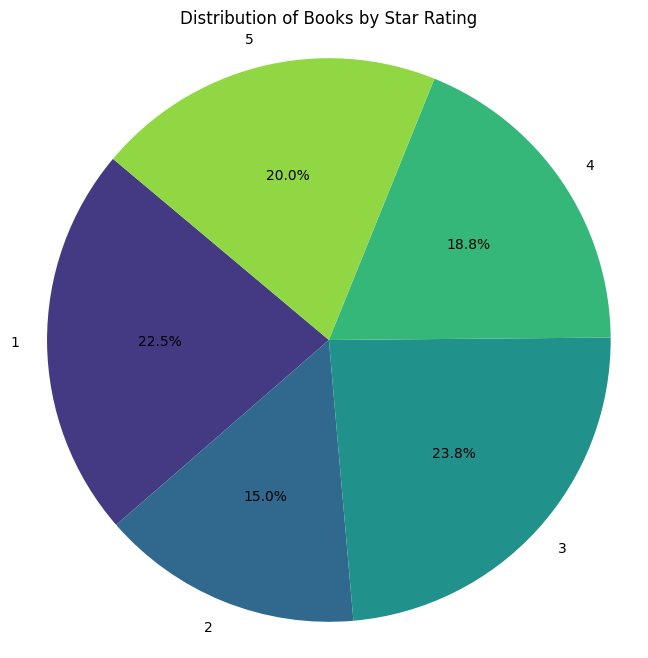

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of star ratings
star_rating_counts = df['star'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(star_rating_counts, labels=star_rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(star_rating_counts)))
plt.title('Distribution of Books by Star Rating')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Average price by rating

/tmp/ipython-input-1323952496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='star', y='price', data=avg_price_by_star, palette='viridis')


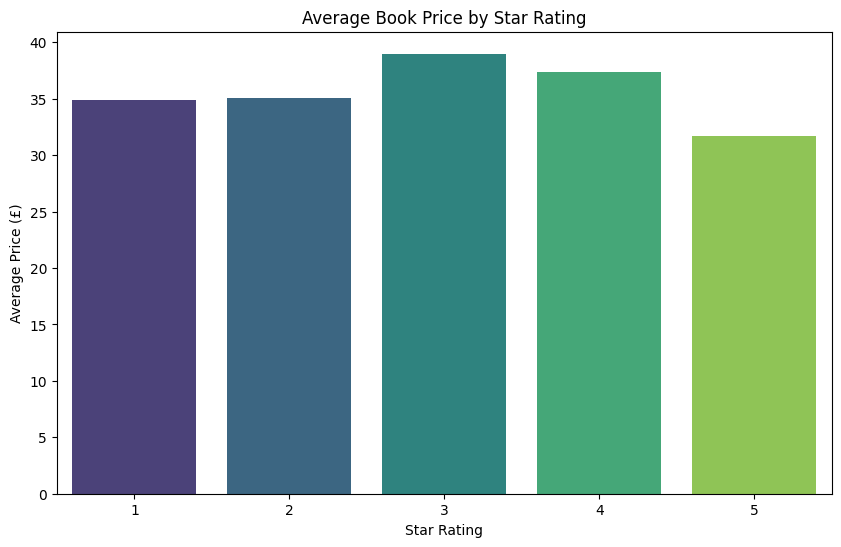

In [ ]:
avg_price_by_star = df.groupby('star')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='star', y='price', data=avg_price_by_star, palette='viridis')
plt.title('Average Book Price by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Price (£)')
plt.show()

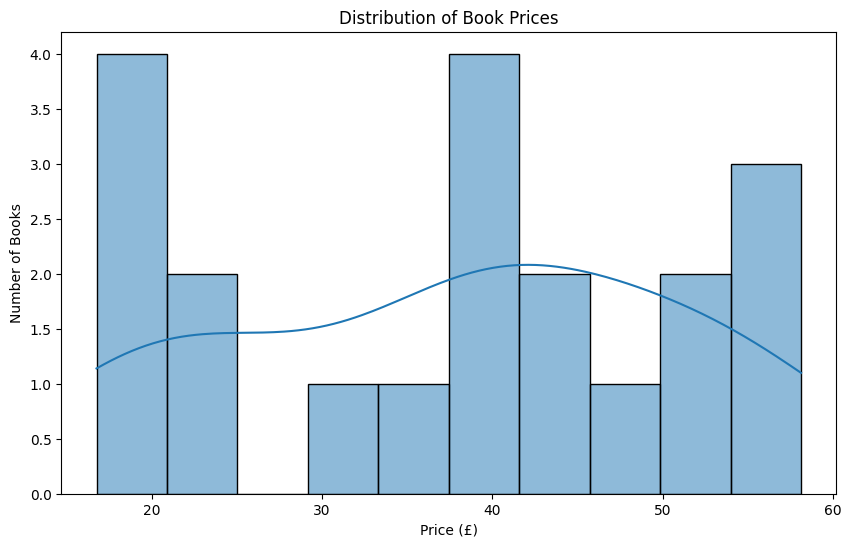

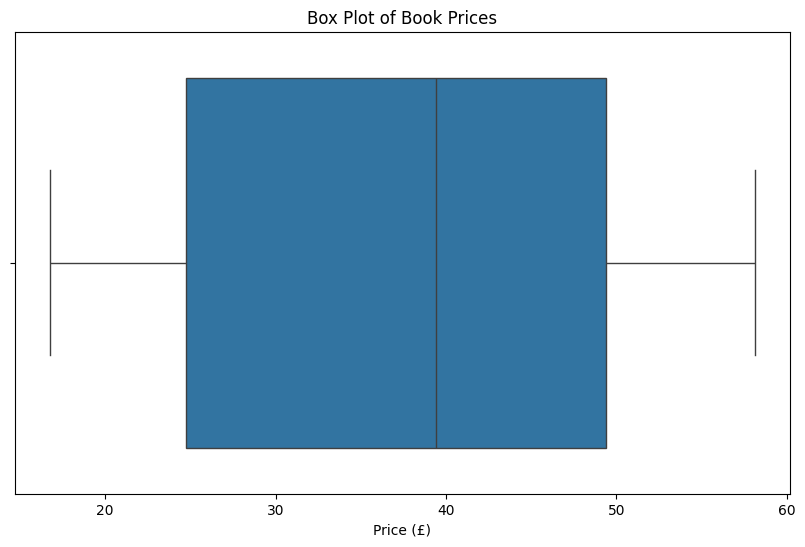

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()

# Create a box plot of the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Book Prices')
plt.xlabel('Price (£)')
plt.show()